In [39]:
import cv2
import numpy as np

def preprocess_image(image):

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue, saturation, value = cv2.split(hsv)
    # Apply histogram equalization to the Value channel
    equalized_value = cv2.equalizeHist(value)
    # Merge channels back
    equalized_hsv = cv2.merge([hue, saturation, equalized_value])
    return equalized_hsv

def adaptive_threshold(image):
    # Perform preprocessing
    preprocessed_image = preprocess_image(image)

    # Convert to grayscale for thresholding
    gray_image = cv2.cvtColor(preprocessed_image, cv2.COLOR_BGR2GRAY)

    # Apply adaptive thresholding
    blockSize = 11  # Size of the neighborhood area
    C = 2  # Constant subtracted from the mean
    adaptive_thresh = cv2.adaptiveThreshold(
        gray_image,
        11,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV,
        blockSize,
        C
    )

    return adaptive_thresh

def otsu_threshold(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Otsu's thresholding
    _, otsu_thresh = cv2.threshold(
        blurred,
        0,  # Initial threshold value; Otsu will determine it
        255,
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )

    return otsu_thresh

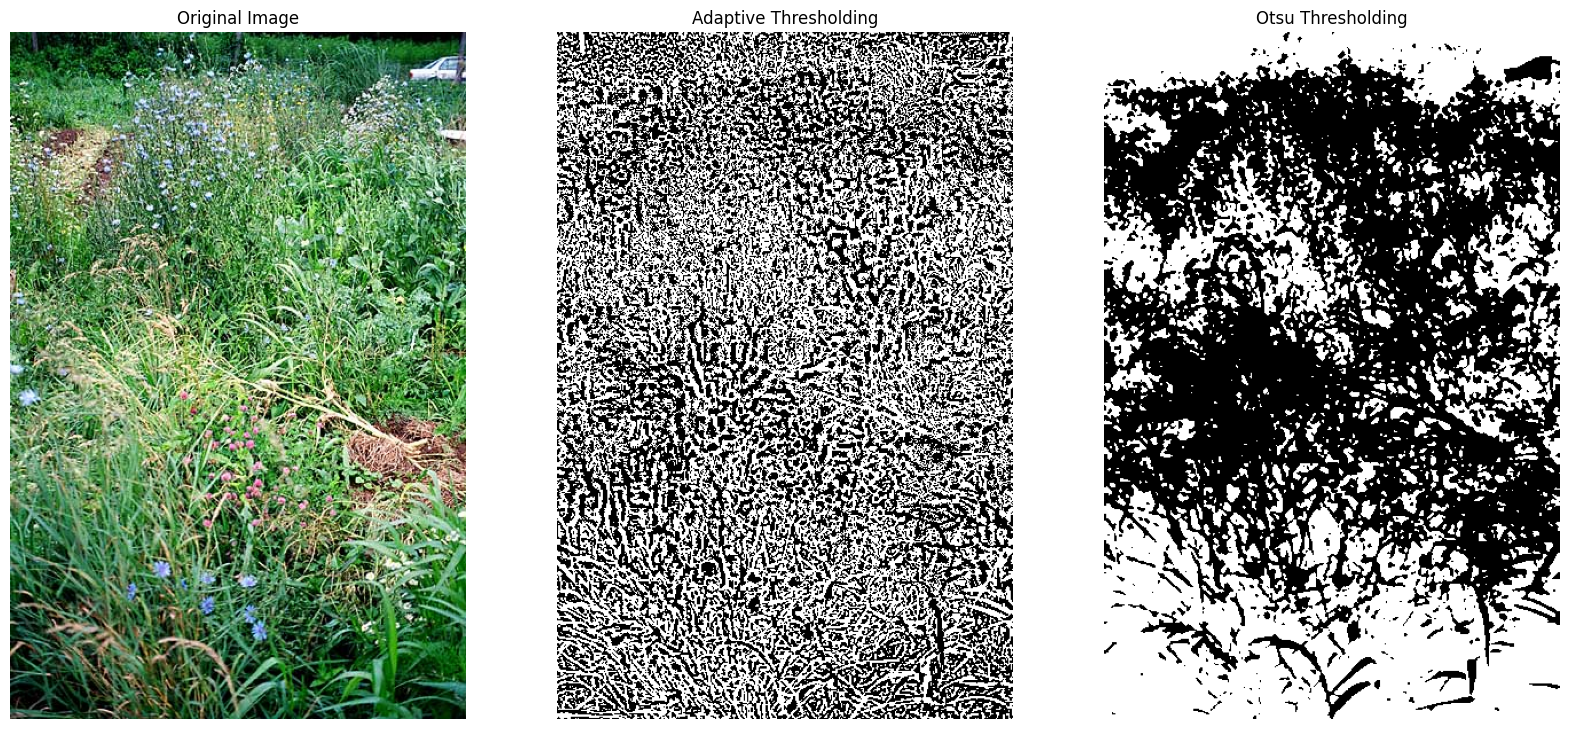

In [40]:
import matplotlib.pyplot as plt
# Load the image from file
image = cv2.imread('image.jpg')
if image is None:
    raise FileNotFoundError("Image file not found.")
# Segment weeds from the image
adaptive_mask = adaptive_threshold(image)
otsu_mask = otsu_threshold(image)
# Plotting
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Adaptive Thresholding')
plt.imshow(adaptive_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Otsu Thresholding')
plt.imshow(otsu_mask, cmap='gray')
plt.axis('off')

plt.show()